In [ ]:
import pandas as pd

data = pd.read_csv('synthetic_population_dataset.csv')

In [ ]:
data.head()

,Unnamed: 0,NAME,id,GENDER,AGE,RACETHN,EDUCCAT5,DIVISION,MARITAL_ACS,HHSIZECAT,...,OWNGUN_GSS,SEXUALITY,HIV_STAT,PREG_STAT,CC_NUM,cc_encoded,cc_disclosed,NumChronicIllness,Unnamed: 47,AGE_INT
0,0,Luke Walsh,1,Male,25,White non-Hispanic,Some college,Mountain,Never married,3+,...,No,Heterosexual,negative,Not Applicable,2248213226375654,1,0,0,NaN,20-29
1,1,Matilde Izaguirre Checa,2,Female,70,Hispanic,HS Grad,West South Central,Divorced,1,...,No,Heterosexual,negative,Negative,2254119539211802,1,0,0,NaN,70-79
2,2,Ryan Smith,3,Male,85,White non-Hispanic,Less than HS,Middle Atlantic,Now married,2,...,No,Heterosexual,negative,Not Applicable,0,0,0,2,NaN,80-89
3,3,Matthew Grimes,4,Male,59,White non-Hispanic,HS Grad,Mountain,Now married,2,...,Yes,Heterosexual,negative,Not Applicable,2397750752924503,1,1,0,NaN,50-59
4,4,Miraan Rama,5,Female,19,Asian,Some college,Pacific,Never married,1,...,No,Heterosexual,negative,Negative,0,0,0,0,NaN,19-Oct


#Data Preprocessing

Handle Missing Values:

* Identify and handle missing values appropriately. Handle imputed data by potentially treating imputed features differently.

Normalize and Scale the Features:

* Normalize numerical features using standardization (mean normalization) Encode categorical features appropriately.

Separate Categorical and Numerical Features:

* Extract and process categorical and numerical features separately.

We don't want to include unnamed or id in pre-processing.

In [ ]:
data = data.drop(['Unnamed: 0', 'id'], axis=1)

## Feature Selection
to do: remove confidence intervals, only numerical col: cc_disclosed

In [ ]:
# Separate numerical and categorical columns
numerical_cols = ['cc_disclosed']

categorical_cols = ['GENDER', 'RACETHN', 'EDUCCAT5', 'DIVISION', 'MARITAL_ACS', 'CHILDRENCAT', # decision: only cluster on demographic features because those are most important for comparison/subgroups
                    'CITIZEN_REC', 'BORN_ACS', 'RELIGCAT', 'AGE_INT']

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import numpy as np

# Impute missing values
imputer_num = SimpleImputer(strategy='mean')
imputer_cat = SimpleImputer(strategy='most_frequent')

data[numerical_cols] = imputer_num.fit_transform(data[numerical_cols])
data[categorical_cols] = imputer_cat.fit_transform(data[categorical_cols])

# Normalize numerical features
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Encode categorical features
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_categorical_data = encoder.fit_transform(data[categorical_cols])
encoded_categorical_df = pd.DataFrame(encoded_categorical_data, columns=encoder.get_feature_names_out(categorical_cols), index=data.index)

# Combine numerical and encoded categorical data
processed_data = pd.concat([data[numerical_cols], encoded_categorical_df], axis=1)

# Display the first few rows of the processed data
processed_data.head()

,cc_disclosed,GENDER_Male,RACETHN_Black non-Hispanic,RACETHN_Hispanic,RACETHN_Other race,RACETHN_White non-Hispanic,EDUCCAT5_HS Grad,EDUCCAT5_Less than HS,EDUCCAT5_Postgraduate,EDUCCAT5_Some college,...,RELIGCAT_Muslim,RELIGCAT_Orthodox Christian,RELIGCAT_Unaffiliated,AGE_INT_20-29,AGE_INT_30-39,AGE_INT_40-49,AGE_INT_50-59,AGE_INT_60-69,AGE_INT_70-79,AGE_INT_80-89
0,-0.853061,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.853061,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.853061,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.172250,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.853061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Feature Reduction using PCA and SVD

Now that we have preprocessed the data, the next step is to reduce the dimensionality of the numerical features using Singular Value Dimension (SVD). SVD helps in reducing the number of features while retaining the most important information.

In [ ]:
from sklearn.decomposition import PCA, TruncatedSVD
# PCA for numerical features
# pca = PCA(n_components=2)
# pca_data = pca.fit_transform(data[numerical_cols])
# pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'], index=data.index)

# Truncated SVD for categorical features as a fallback
svd = TruncatedSVD(n_components=2)
svd_data = svd.fit_transform(encoded_categorical_df)
svd_df = pd.DataFrame(data=svd_data, columns=['SVD1', 'SVD2'], index=data.index)

# Clustering on Features Alone

The primary goal of clustering for this study is to group similar synthetic individuals based on their attributes. This clustering helps to:

### Ensure Uniform Distribution:
* Clustering purely on features ensures that people within each cluster are similar in terms of their attributes. This helps in creating a uniform distribution of similar data points across the clusters.

### Theoretical Basis
* Clear Interpretation: Clusters formed based on attributes alone are easier to interpret, as each cluster represents a group of individuals with similar attribute profiles.

* We are studying harm as how others perceive you. The clusters being based purely on attributes (as in, we don't know uncertainty levels for everyone) can act as a control. We can more easily measure how uncertainty affects harm and perception, especially within clusters, once the surveys are conducted, because we have each cluster as an initial control – we can see how different people with different uncertainty values score as we get the results from the survey.  

* This also allows us to keep clustering more straightforward.

C:\Users\86177\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


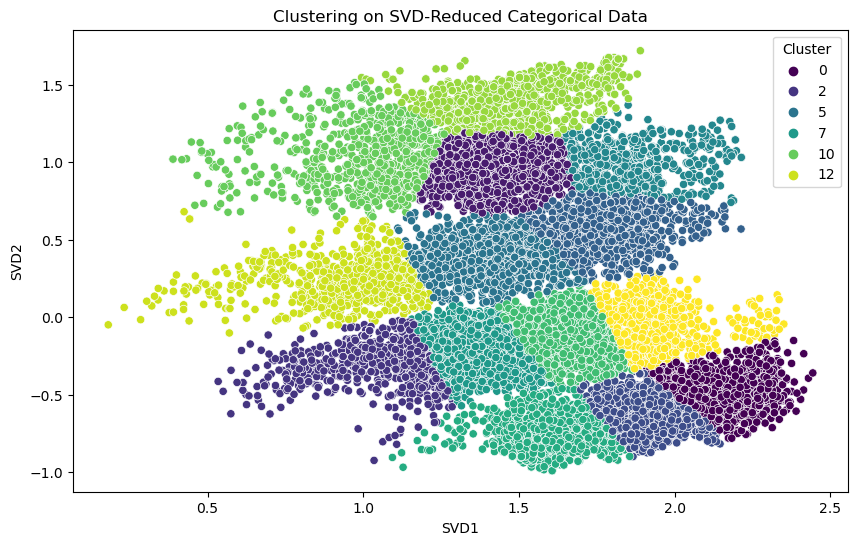

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# K-means clustering on SVD-reduced categorical data
kmeans_svd = KMeans(n_clusters=14, random_state=42)
svd_clusters = kmeans_svd.fit_predict(svd_df)

# Add cluster labels to the SVD DataFrame
svd_df['Cluster'] = svd_clusters

# Seaborn scatter plot for SVD-reduced categorical data with clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SVD1', y='SVD2', hue='Cluster', palette='viridis', data=svd_df)
plt.title('Clustering on SVD-Reduced Categorical Data')
plt.show()

C:\Users\86177\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\86177\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\86177\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\86177\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\86177\anaconda3\Lib\site-packages\sklearn\clust

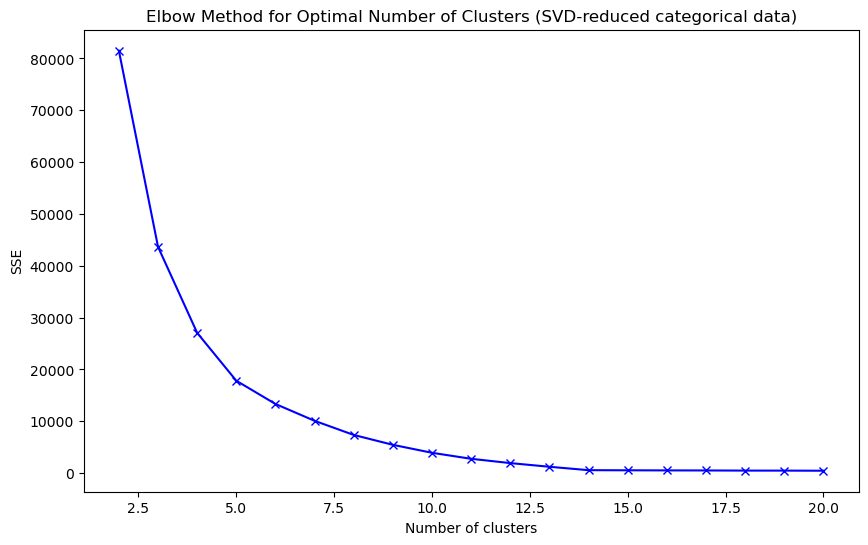

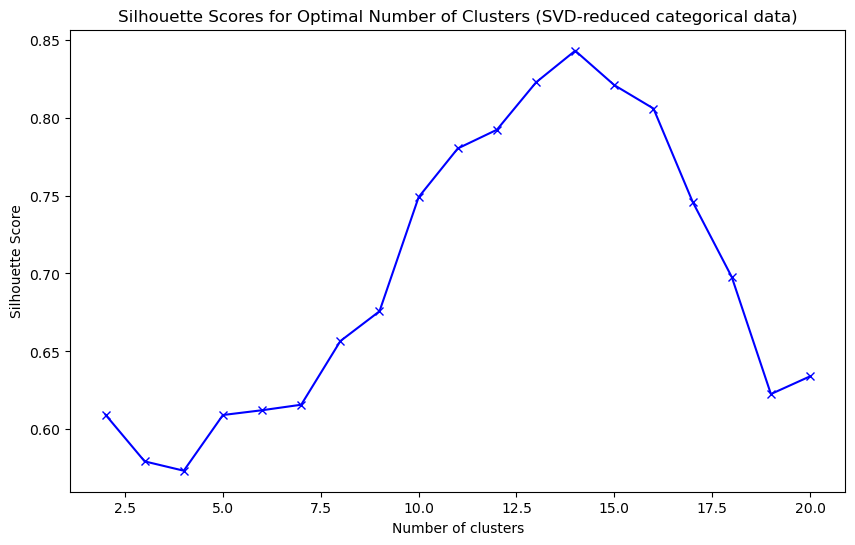

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Optimize number of clusters using elbow method and silhouette score for SVD-reduced categorical data
sse_svd = []
silhouette_scores_svd = []
K = range(2, 21)
for k in K:
    kmeans_svd = KMeans(n_clusters=k, random_state=42)
    kmeans_svd.fit(svd_df)
    sse_svd.append(kmeans_svd.inertia_)
    silhouette_scores_svd.append(silhouette_score(svd_df, kmeans_svd.labels_))

# Plot elbow method results for SVD-reduced categorical data
plt.figure(figsize=(10, 6))
plt.plot(K, sse_svd, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal Number of Clusters (SVD-reduced categorical data)')
plt.show()

# Plot silhouette scores for SVD-reduced categorical data
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores_svd, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Optimal Number of Clusters (SVD-reduced categorical data)')
plt.show()

Concatenate svd_df[Clusters] to data

In [ ]:
data = pd.concat([data, svd_df['Cluster']], axis=1)

In [ ]:
data.head()

,NAME,GENDER,AGE,RACETHN,EDUCCAT5,DIVISION,MARITAL_ACS,HHSIZECAT,CHILDRENCAT,CITIZEN_REC,...,SEXUALITY,HIV_STAT,PREG_STAT,CC_NUM,cc_encoded,cc_disclosed,NumChronicIllness,Unnamed: 47,AGE_INT,Cluster
0,Luke Walsh,Male,25,White non-Hispanic,Some college,Mountain,Never married,3+,No children,"Yes, a U.S. citizen",...,Heterosexual,negative,Not Applicable,2248213226375654,1,-0.853061,0,NaN,20-29,6
1,Matilde Izaguirre Checa,Female,70,Hispanic,HS Grad,West South Central,Divorced,1,No children,"No, not a U.S. citizen",...,Heterosexual,negative,Negative,2254119539211802,1,-0.853061,0,NaN,70-79,12
2,Ryan Smith,Male,85,White non-Hispanic,Less than HS,Middle Atlantic,Now married,2,No children,"No, not a U.S. citizen",...,Heterosexual,negative,Not Applicable,0,0,-0.853061,2,NaN,80-89,8
3,Matthew Grimes,Male,59,White non-Hispanic,HS Grad,Mountain,Now married,2,No children,"Yes, a U.S. citizen",...,Heterosexual,negative,Not Applicable,2397750752924503,1,1.172250,0,NaN,50-59,3
4,Miraan Rama,Female,19,Asian,Some college,Pacific,Never married,1,No children,"No, not a U.S. citizen",...,Heterosexual,negative,Negative,0,0,-0.853061,0,NaN,19-Oct,10


In [ ]:
data.tail()

,NAME,GENDER,AGE,RACETHN,EDUCCAT5,DIVISION,MARITAL_ACS,HHSIZECAT,CHILDRENCAT,CITIZEN_REC,...,SEXUALITY,HIV_STAT,PREG_STAT,CC_NUM,cc_encoded,cc_disclosed,NumChronicIllness,Unnamed: 47,AGE_INT,Cluster
19995,Gabrielle Francis,Female,46,White non-Hispanic,Less than HS,Middle Atlantic,Now married,1,No children,"No, not a U.S. citizen",...,Heterosexual,negative,Positive,0,0,-0.853061,2,NaN,40-49,2
19996,Anselma Llobet Ib??ez,Female,26,Hispanic,College grad,West South Central,Never married,2,No children,"Yes, a U.S. citizen",...,Heterosexual,negative,Negative,2286010456900323,1,1.172250,0,NaN,20-29,10
19997,Mary Carrillo,Female,25,Black non-Hispanic,HS Grad,West North Central,Never married,3+,One or more children,"No, not a U.S. citizen",...,Heterosexual,negative,Negative,2640673477975722,1,1.172250,0,NaN,20-29,10
19998,Ruperta Pazos Alvarez,Female,53,Hispanic,Some college,Mountain,Now married,3+,No children,"Yes, a U.S. citizen",...,Heterosexual,negative,Negative,5196895632351314,1,-0.853061,0,NaN,50-59,7
19999,Catherine Ibarra,Female,26,White non-Hispanic,College grad,West South Central,Never married,2,No children,"Yes, a U.S. citizen",...,Heterosexual,negative,Negative,2225505240379407,1,-0.853061,0,NaN,20-29,1


Clusters to csv

In [ ]:
data.to_csv('clustered_data.csv', index=False)